#### Data: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [1]:
!ls

BreastCancer		     app.py				static
BreastCancerDetection.ipynb  breast-cancer-accuracy-98-3.ipynb	templates
BrestCancerClassifier.pkl    data.csv


In [2]:
# Importing necessary packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### All the columns have numerical values except the 'diagnosis' column which is the target column

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### There is no null value in the Dataset

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Seems like there are no outliers in the data but some distribution can be skewed

In [9]:
%matplotlib inline

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


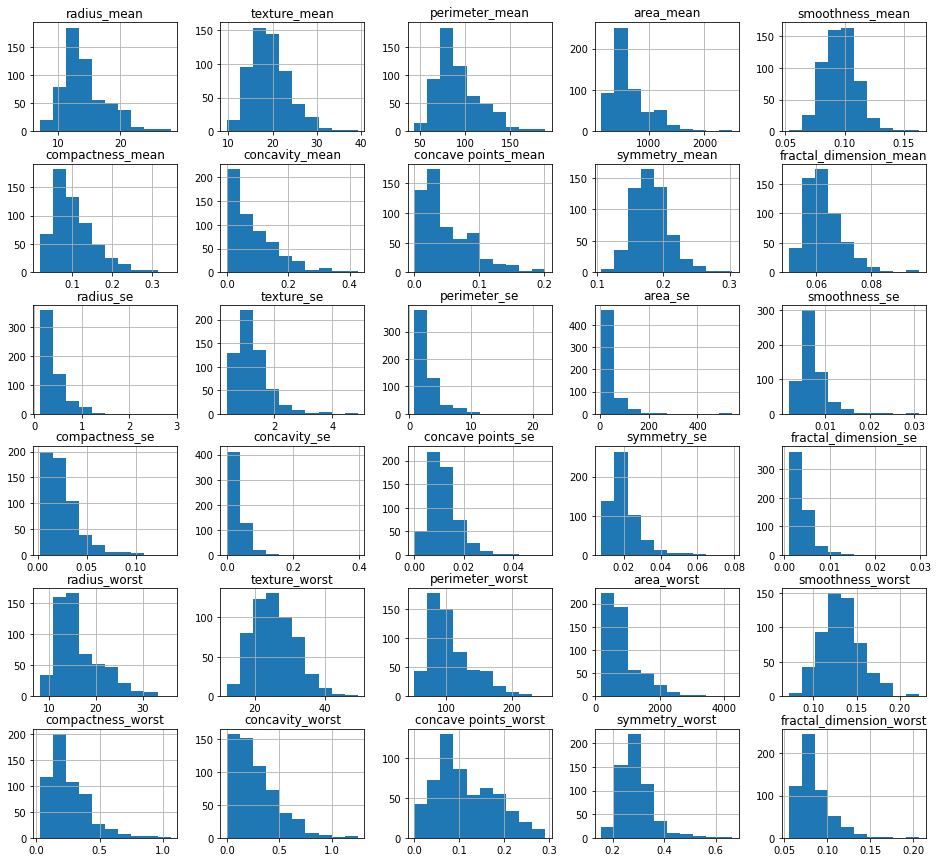

In [10]:
df.hist(bins=10, figsize=(16,15))
plt.show()

In [11]:
df.shape

(569, 31)

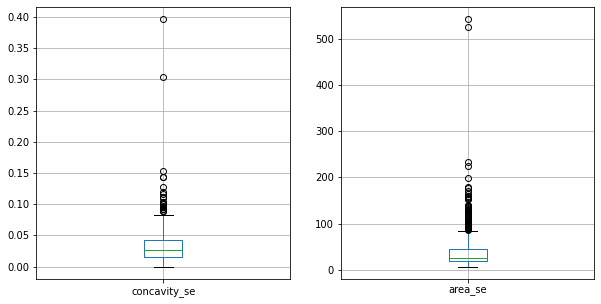

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df.boxplot(column=['concavity_se'])
plt.subplot(1,2,2)
df.boxplot(column=['area_se'])
plt.show()

In [13]:
# Removing the outliers
df = df[(df['concavity_se']<0.20) & (df['area_se']<300)]

In [14]:
df.diagnosis.value_counts()

B    355
M    210
Name: diagnosis, dtype: int64

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='area_se', ylabel='concavity_se'>

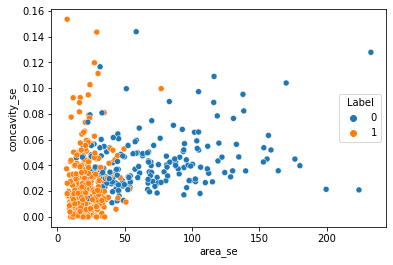

In [18]:
sns.scatterplot(df['area_se'], df['concavity_se'], hue=df['Label'])

# Feature Engineering

In [31]:
# Creating a numerical column 'Label' where the values are 0 when 'diagnosis' is 'M' and 1 else

In [17]:
df['Label'] = df['diagnosis'].apply(lambda x: 0 if x=='M' else (1 if x=='B' else 'None'))

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df[['diagnosis','Label']]

,diagnosis,Label
0,M,0
1,M,0
2,M,0
3,M,0
4,M,0
...,...,...
564,M,0
565,M,0
566,M,0
567,M,0


<AxesSubplot:>

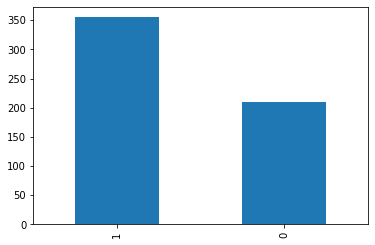

In [20]:
df['Label'].value_counts().plot(kind='bar')

In [21]:
print(df['diagnosis'].value_counts(),'\n', df['Label'].value_counts())

B    355
M    210
Name: diagnosis, dtype: int64 
 1    355
0    210
Name: Label, dtype: int64


In [22]:
df.drop('diagnosis', axis=1, inplace=True)

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Some More EDA

In [23]:
correaltion = df.corr()

In [24]:
correaltion['Label'].sort_values(ascending=False)

Label                      1.000000
smoothness_se              0.070176
symmetry_se                0.007300
texture_se                 0.006320
fractal_dimension_mean    -0.000917
fractal_dimension_se      -0.103073
compactness_se            -0.308324
symmetry_mean             -0.339126
fractal_dimension_worst   -0.339231
smoothness_mean           -0.358266
concavity_se              -0.360097
texture_mean              -0.413061
smoothness_worst          -0.425840
symmetry_worst            -0.430370
concave points_se         -0.442084
texture_worst             -0.458687
compactness_worst         -0.595713
compactness_mean          -0.598129
perimeter_se              -0.605948
radius_se                 -0.615224
area_se                   -0.654916
concavity_worst           -0.687496
area_mean                 -0.722341
concavity_mean            -0.723015
radius_mean               -0.733621
area_worst                -0.744226
perimeter_mean            -0.747025
radius_worst              -0

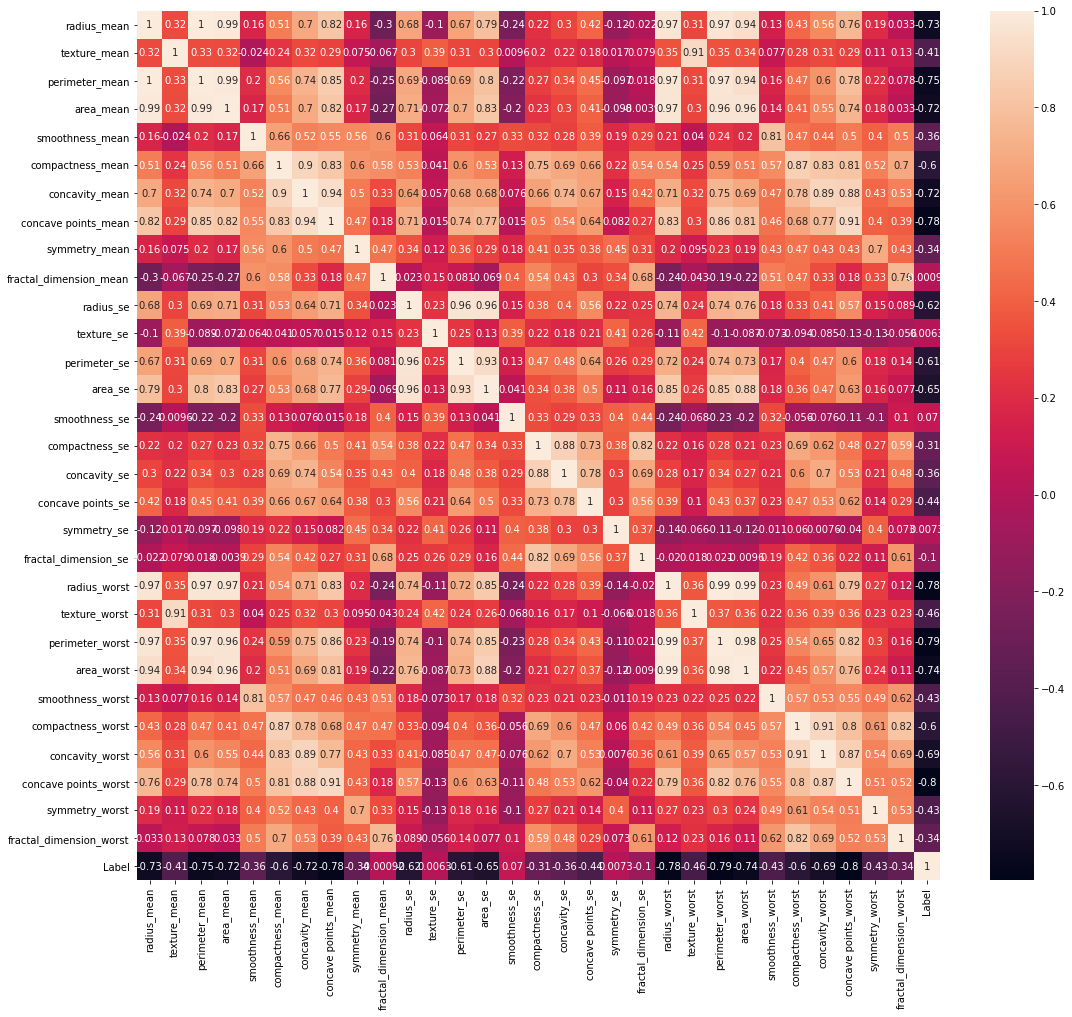

In [25]:
### Let us check the correlation of Label with the features
plt.figure(figsize=(18,16))
sns.heatmap(correaltion, annot=True)
plt.show()

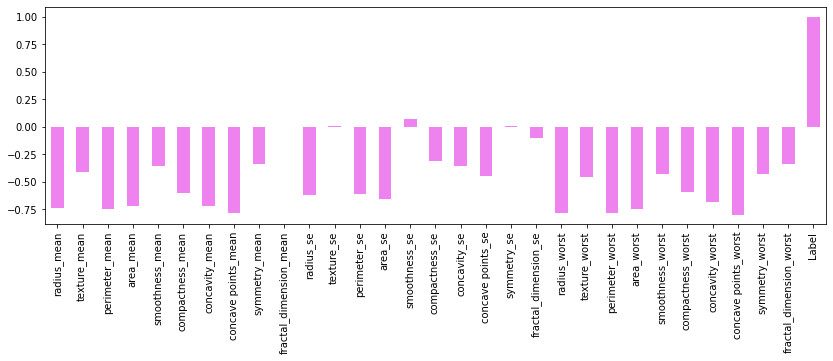

In [26]:
plt.figure(figsize=(14,4))
correaltion['Label'].plot(kind='bar', color='violet')
plt.show()

In [27]:
#selecting columns which have very less correlation
least_corr_cols = list(correaltion[abs(correaltion['Label'])<0.2].index)

In [28]:
# Removing columns which have very less correlation
df1 = df.drop(least_corr_cols, axis=1)

### Except for 4 features, all the other features shows big negative correlation. If the accuracy in prediction is less then will do further feature engineering with these small postive correlated columns

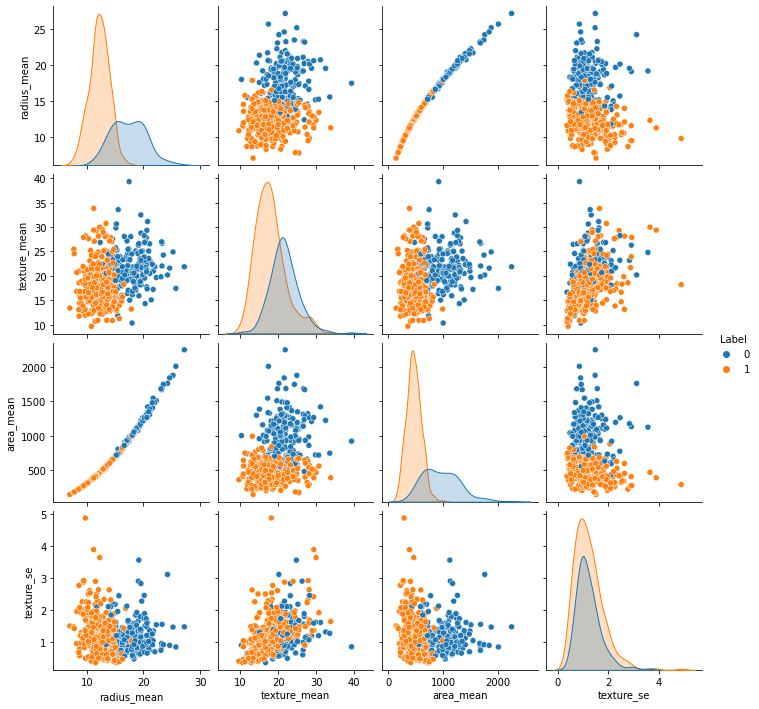

In [29]:
# Checking distribution dependancy of each variable using pairplot
sns.pairplot(df, hue='Label', vars=['radius_mean', 'texture_mean', 'area_mean', 'texture_se'])

# Prepare Data

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [31]:
df1.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Label'],
      dtype='object')

In [32]:
df1.iloc[0:1,25]

0    0
Name: Label, dtype: int64

In [33]:
X = df1.iloc[:,0:25].values
y = df1.iloc[:,25].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [35]:
print("The shape of X_train:", X_train.shape, '\n',
     "The shape of X_test:", X_test.shape, '\n',
     "The shape of y_train:", y_train.shape, '\n',
     "The shape of y_test:", y_test.shape)

The shape of X_train: (395, 25) 
 The shape of X_test: (170, 25) 
 The shape of y_train: (395,) 
 The shape of y_test: (170,)


In [36]:
# standardize data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Importing the ML models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression



In [38]:
models = []
Names = []
Scores = []
scores = {}

#models.append( ('LR',LogisticRegression()) )
models.append( ('knn',KNeighborsClassifier()) )
models.append( ('DT',DecisionTreeClassifier()) )
models.append( ('RF',RandomForestClassifier()) )
models.append( ('GBR',GradientBoostingClassifier()) )
models.append( ('ADA',AdaBoostClassifier()) )
models.append( ('ETR',ExtraTreesClassifier()) )
models.append( ('NB',GaussianNB()) )



for name, model in models:
    Names.append(name)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    Scores.append(acc)
    scores.update({name:acc})



In [39]:
scores

{'knn': 0.9529411764705882,
 'DT': 0.9294117647058824,
 'RF': 0.9470588235294117,
 'GBR': 0.9529411764705882,
 'ADA': 0.9529411764705882,
 'ETR': 0.9529411764705882,
 'NB': 0.9058823529411765}

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


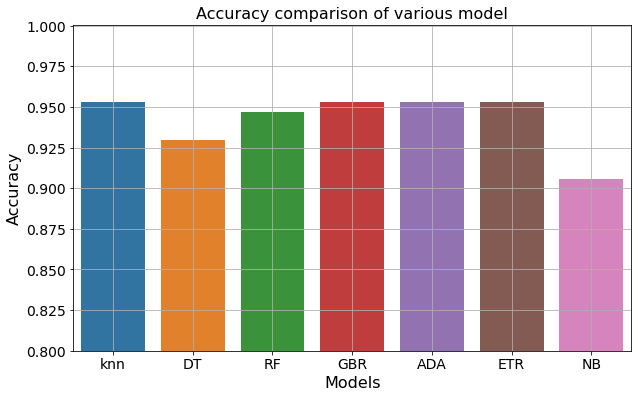

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(Names, Scores)


plt.title("Accuracy comparison of various model", fontsize=16)
plt.ylim(0.8,)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.xlabel("Models", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.show()

## KNN, ETR, ADA are giving the most accuracy. Let us check the cross validation score

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report


In [42]:
etr = ExtraTreesClassifier()
cross_val_score(etr, X, y, cv=5).mean()

0.9610619469026549

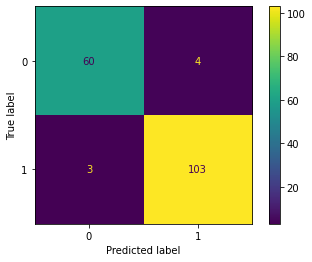

In [43]:
etr.fit(X_train,y_train)
plot_confusion_matrix(etr, X_test, y_test)

In [44]:
print(classification_report(y_test, etr.predict(X_test), target_names=['malignant 0', 'Benign 1']))

              precision    recall  f1-score   support

 malignant 0       0.95      0.94      0.94        64
    Benign 1       0.96      0.97      0.97       106

    accuracy                           0.96       170
   macro avg       0.96      0.95      0.96       170
weighted avg       0.96      0.96      0.96       170



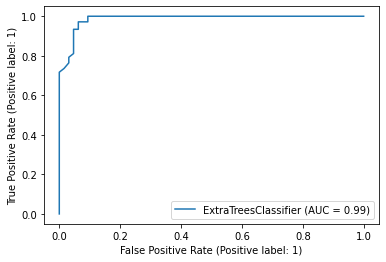

In [45]:
plot_roc_curve(etr, X_test, y_test)

In [46]:
knn = KNeighborsClassifier()
cross_val_score(knn, X, y, cv=5).mean()

0.9309734513274336

In [47]:
ada = AdaBoostClassifier()
cross_val_score(ada, X, y,cv=5).mean()

0.9663716814159292

### Let us take ETR as our final model

## Let us Do Some hyper Parameter tuning and see if we can improve this accuracy

In [48]:
etr.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_impurity_split',
 'random_state',
 'ccp_alpha')

In [49]:
etr.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [50]:
etr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [51]:
params = {'max_depth': list(np.arange(10,100,10)),
         'min_samples_leaf':list(np.arange(1,8,1)),
         'min_samples_split':list(np.arange(1,10,1)),
         'max_features': ['auto','sqrt']}

In [52]:
etr_random = RandomizedSearchCV(estimator=etr, param_distributions=params, cv=5, n_iter=20, n_jobs=-1, verbose=1, random_state=2)

In [53]:
etr_random.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/joblib/paralle

/home/abhisek/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.9699115  0.9539823  0.95929204 0.95575221        nan 0.96814159
 0.95752212 0.95929204 0.9539823  0.96283186 0.96814159 0.9539823
 0.95575221 0.95929204 0.97345133 0.9539823  0.95221239 0.95929204
 0.95929204 0.96106195]
  category=UserWarning


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9]},
                   random_state=2, verbose=1)

In [54]:
etr_random.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60}

In [55]:
etr_random.best_score_

0.9734513274336283

In [56]:
etr_random.cv_results_

{'mean_fit_time': array([0.24361205, 0.22893338, 0.22651649, 0.22541018, 0.09697237,
        0.23240876, 0.22702708, 0.22783084, 0.22307568, 0.22563181,
        0.22867966, 0.22500749, 0.2241756 , 0.22727304, 0.2323947 ,
        0.22561259, 0.22595272, 0.22411714, 0.229319  , 0.23538151]),
 'std_fit_time': array([0.0163865 , 0.0032379 , 0.00261823, 0.0029164 , 0.00428758,
        0.0035328 , 0.00115073, 0.00034018, 0.00101429, 0.0009449 ,
        0.00193976, 0.00043615, 0.00219487, 0.00154309, 0.00252896,
        0.00224956, 0.0020364 , 0.00107512, 0.00133813, 0.01068046]),
 'mean_score_time': array([0.02059789, 0.02083092, 0.02144642, 0.02052784, 0.        ,
        0.02091212, 0.02109303, 0.0207952 , 0.02047367, 0.02054791,
        0.02094955, 0.0206459 , 0.02121506, 0.02106838, 0.02169628,
        0.0211586 , 0.02107091, 0.02066965, 0.02081742, 0.02122126]),
 'std_score_time': array([4.96601119e-05, 6.40848960e-04, 1.45374775e-03, 2.46545608e-04,
        0.00000000e+00, 6.09653275e-

In [57]:
cv_results = etr_random.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(mean_score, params)

0.9699115044247788 {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80}
0.9539823008849557 {'min_samples_split': 9, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 60}
0.95929203539823 {'min_samples_split': 3, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 50}
0.9557522123893805 {'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 50}
nan {'min_samples_split': 1, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 40}
0.9681415929203541 {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
0.9575221238938054 {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 50}
0.95929203539823 {'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 40}
0.9539823008849557 {'min_samples_split': 9, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 80}
0.9628318584070797 {'min_samples_split': 4, 'mi

In [62]:
etr_best = ExtraTreesClassifier(min_samples_split= 3, min_samples_leaf= 1, max_features= 'auto',max_depth= 60)

In [63]:
etr_best.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=60, min_samples_split=3)

In [64]:
accuracy_score(y_test, etr_best.predict(X_test))

0.9529411764705882

In [65]:
import joblib

In [66]:
joblib.dump(etr_best, 'BreastCancerClassifier.pkl')

['BreastCancerClassifier.pkl']

In [107]:
joblib.dump(sc, 'BreastCancerScaler.pkl')

['BreastCancerScaler.pkl']

In [108]:
modl = joblib.load('BrestCancerClassifier.pkl')
scaler = joblib.load('BreastCancerScaler.pkl')

In [112]:
features=[np.array([1.308e+01, 1.571e+01, 8.563e+01, 5.200e+02, 1.075e-01, 1.270e-01,
       4.568e-02, 3.110e-02, 1.967e-01, 1.852e-01, 1.383e+00, 1.467e+01,
       1.898e-02, 1.698e-02, 6.490e-03, 1.450e+01, 2.049e+01, 9.609e+01,
       6.305e+02, 1.312e-01, 2.776e-01, 1.890e-01, 7.283e-02, 3.184e-01,
       8.183e-02])]
f = scaler.transform(features)

In [113]:
etr_best.predict(f)

array([1])

In [111]:
pd.set_option('display.max_columns',None)
df1[df1['Label']==1].iloc[1,:].to_numpy()

array([1.308e+01, 1.571e+01, 8.563e+01, 5.200e+02, 1.075e-01, 1.270e-01,
       4.568e-02, 3.110e-02, 1.967e-01, 1.852e-01, 1.383e+00, 1.467e+01,
       1.898e-02, 1.698e-02, 6.490e-03, 1.450e+01, 2.049e+01, 9.609e+01,
       6.305e+02, 1.312e-01, 2.776e-01, 1.890e-01, 7.283e-02, 3.184e-01,
       8.183e-02, 1.000e+00])

In [117]:
df1[df1['Label']==0].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,8.589,153.40,0.04904,0.05373,0.01587,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,3.398,74.08,0.01308,0.01860,0.01340,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,4.585,94.03,0.04006,0.03832,0.02058,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,3.445,27.23,0.07458,0.05661,0.01867,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,5.438,94.44,0.02461,0.05688,0.01885,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
